In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
import pandas as pd

Data = pd.DataFrame(ProductionTank)


In [7]:
Data.replace("STEP2_CONS", 
           "STEP2_CONS-Deaeration", 
           inplace=True)

In [8]:
print(Data[['Instruction_Step', 'Phase_start_delay']].isnull().sum())

Instruction_Step     25
Phase_start_delay     0
dtype: int64


In [9]:
#Data

### Exploring the Instruction steps or phases and the phase start delay times

In [10]:
grouped_data = Data.groupby('Instruction_Step')['Phase_start_delay','Phase_duration'].sum()
print(grouped_data)

                                                    Phase_start_delay  \
Instruction_Step                                                        
DEAERATE FOR 12 HOURS (NO AGITATION).                              17   
ENSURE GUM IS MIXED IN                                              0   
ENSURE GUM IS MIXED IN ?                                          629   
ENSURE THAT THE CORRECT GUM WILL BE USED                            1   
GUM_PROMPT                                                          4   
HP                                                              14407   
PLEASE VERIFY BULK ADDITION                                        77   
PROCEED ONLY WHEN GUM IS DISSOLVED.                                 1   
PROCEED WHEN SAMPLE IS DEAREATED AND DENSITY IS OK                 52   
S3_BATCH_IN_PROGRESS                                               31   
S4_BATCH_COMPLETE_QA_PENDING                                     1273   
S7_RELEASED_TO_FILLING                             

In [11]:
grouped_data = Data.groupby('Instruction_Step')['Phase_start_delay'].describe()
print(grouped_data)

                                                     count         mean  \
Instruction_Step                                                          
DEAERATE FOR 12 HOURS (NO AGITATION).                  9.0     1.888889   
ENSURE GUM IS MIXED IN                                 2.0     0.000000   
ENSURE GUM IS MIXED IN ?                             289.0     2.176471   
ENSURE THAT THE CORRECT GUM WILL BE USED               9.0     0.111111   
GUM_PROMPT                                            96.0     0.041667   
HP                                                   665.0    21.664662   
PLEASE VERIFY BULK ADDITION                          489.0     0.157464   
PROCEED ONLY WHEN GUM IS DISSOLVED.                    9.0     0.111111   
PROCEED WHEN SAMPLE IS DEAREATED AND DENSITY IS OK   104.0     0.500000   
S3_BATCH_IN_PROGRESS                                 345.0     0.089855   
S4_BATCH_COMPLETE_QA_PENDING                        1107.0     1.149955   
S7_RELEASED_TO_FILLING   

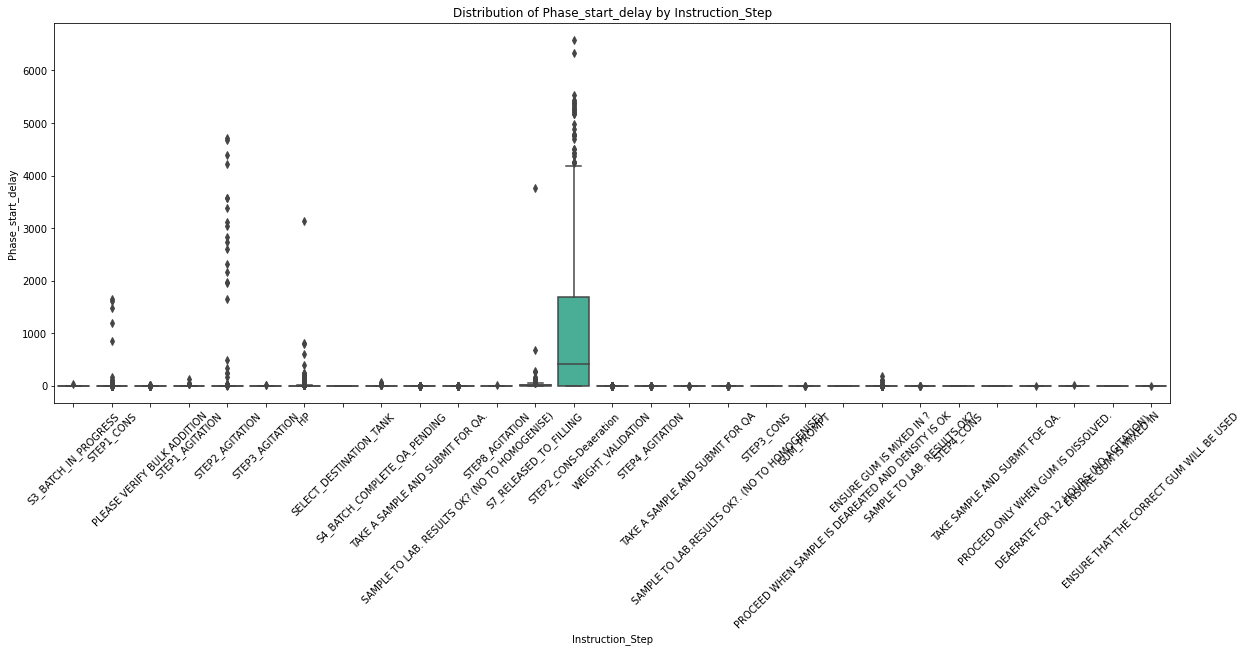

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7))
sns.boxplot(data=Data, x='Instruction_Step', y='Phase_start_delay')
plt.xticks(rotation=45)
plt.title('Distribution of Phase_start_delay by Instruction_Step')
plt.show()

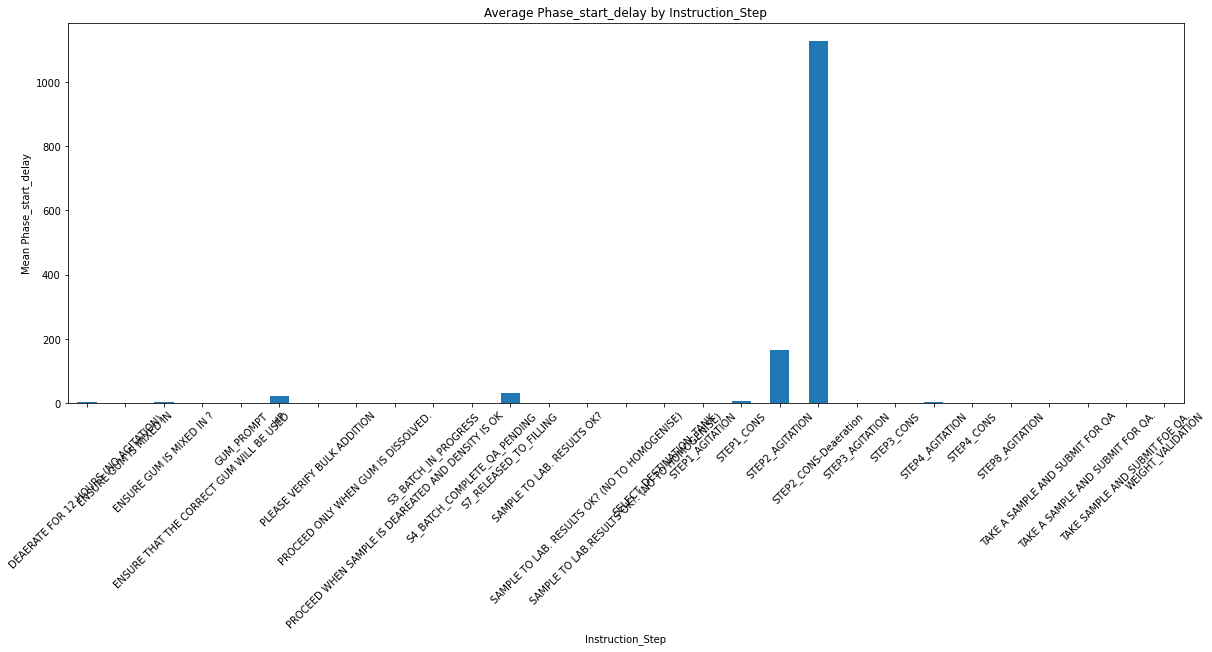

In [16]:
mean_delays = Data.groupby('Instruction_Step')['Phase_start_delay'].mean()
mean_delays.plot(kind='bar', figsize=(20, 7))
plt.title('Average Phase_start_delay by Instruction_Step')
plt.ylabel('Mean Phase_start_delay')
plt.xlabel('Instruction_Step')
plt.xticks(rotation=45)
plt.show()

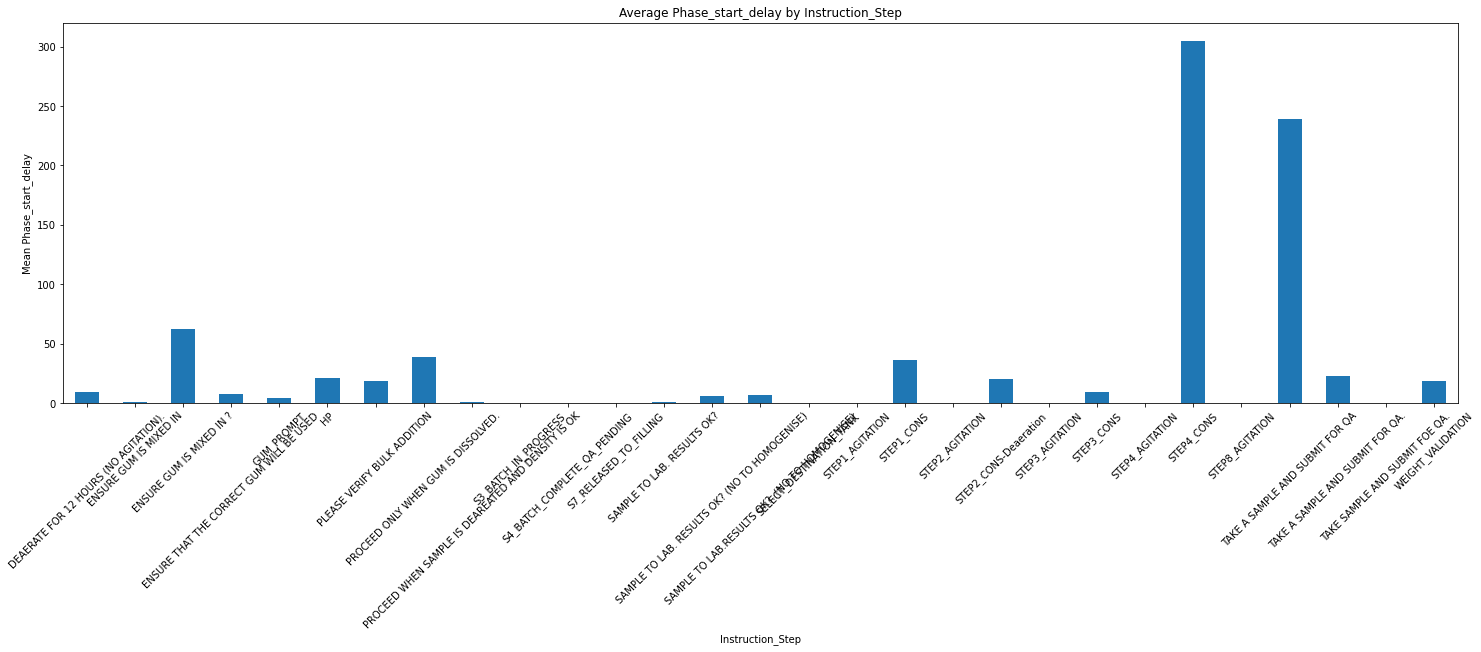

In [17]:
mean_delays = Data.groupby('Instruction_Step')['Phase_overrun'].mean()
mean_delays.plot(kind='bar', figsize=(25, 7))
plt.title('Average Phase_start_delay by Instruction_Step')
plt.ylabel('Mean Phase_start_delay')
plt.xlabel('Instruction_Step')
plt.xticks(rotation=45)
plt.show()

In [18]:
filtered_data = Data[Data['Instruction_Step'] == 'STEP2_CONS-Deaeration']

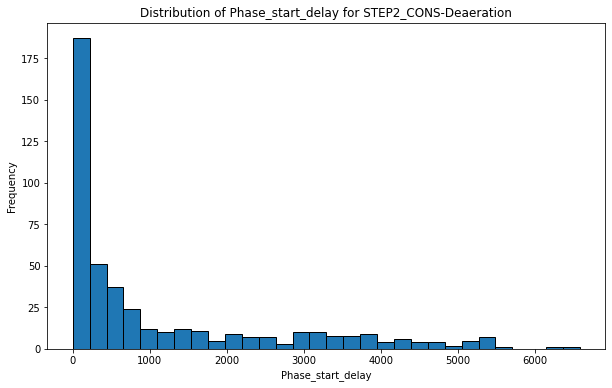

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Phase_start_delay'], bins=30, edgecolor='black')
plt.title('Distribution of Phase_start_delay for STEP2_CONS-Deaeration')
plt.xlabel('Phase_start_delay')
plt.ylabel('Frequency')
plt.show()

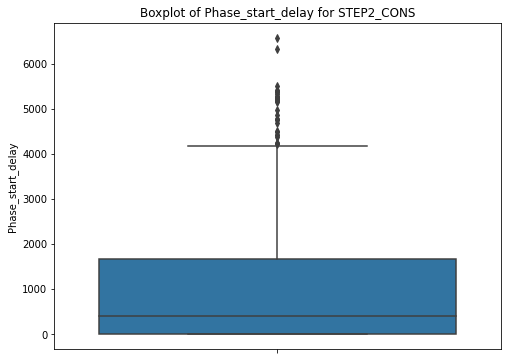

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['Phase_start_delay'])
plt.title('Boxplot of Phase_start_delay for STEP2_CONS')
plt.ylabel('Phase_start_delay')
plt.show()

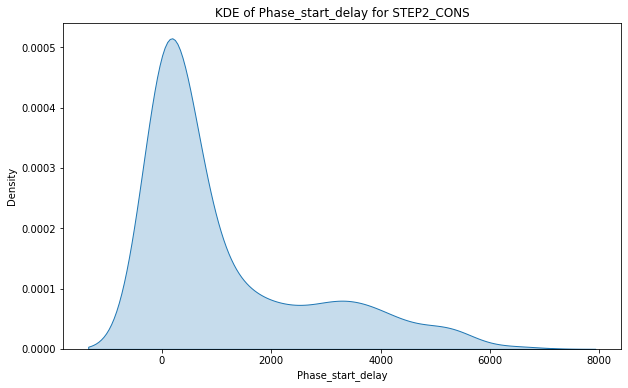

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_data['Phase_start_delay'], shade=True)
plt.title('KDE of Phase_start_delay for STEP2_CONS')
plt.xlabel('Phase_start_delay')
plt.show()

#### Exploring the different deaeration times ( start Phase delay duration) for each of the groups of productions tanks and their common materials 

#### Deaeration in  Production Tanks : '2202', '2203', '2204'

In [22]:
tanks_in_group1 = ['2202', '2203', '2204']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [24]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [26]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [29]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]
#filtered_data

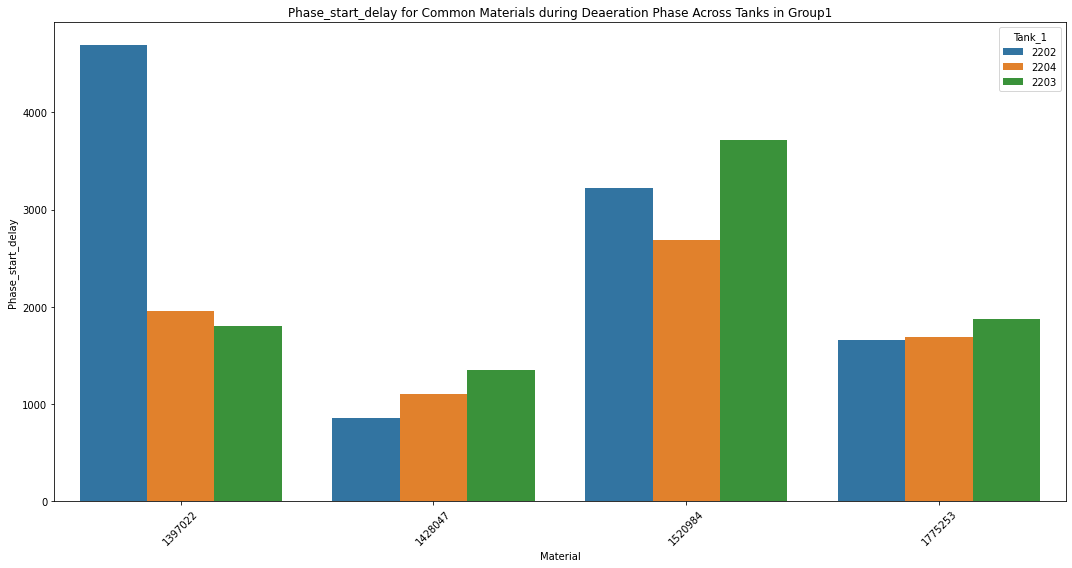

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ingredient Addition - STEP1_CONS  tanks_in_group1 = ['2202', '2203', '2204']

In [32]:
tanks_in_group1 = ['2202', '2203', '2204']
instruction_step_of_interest ="STEP1_CONS"

In [33]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [34]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [35]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

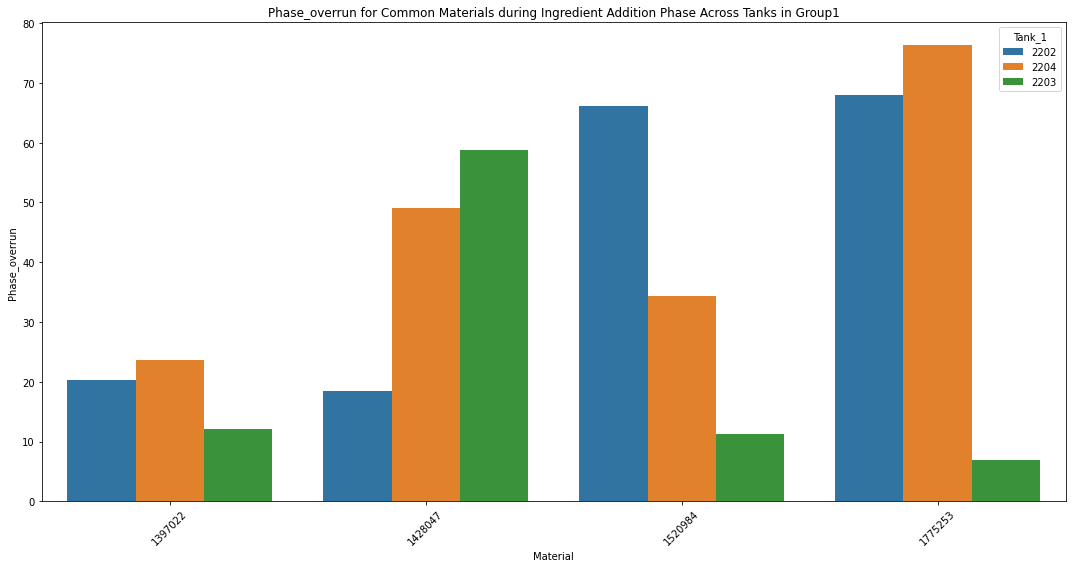

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Phase_overrun for Common Materials during Ingredient Addition Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
####  Ingredient Addition - STEP1_CONS  Production Tanks  : '2302', '2304', '2305'

In [37]:
tanks_in_group1 = ['2302', '2304', '2305']
instruction_step_of_interest ="STEP1_CONS"

In [38]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [39]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [40]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

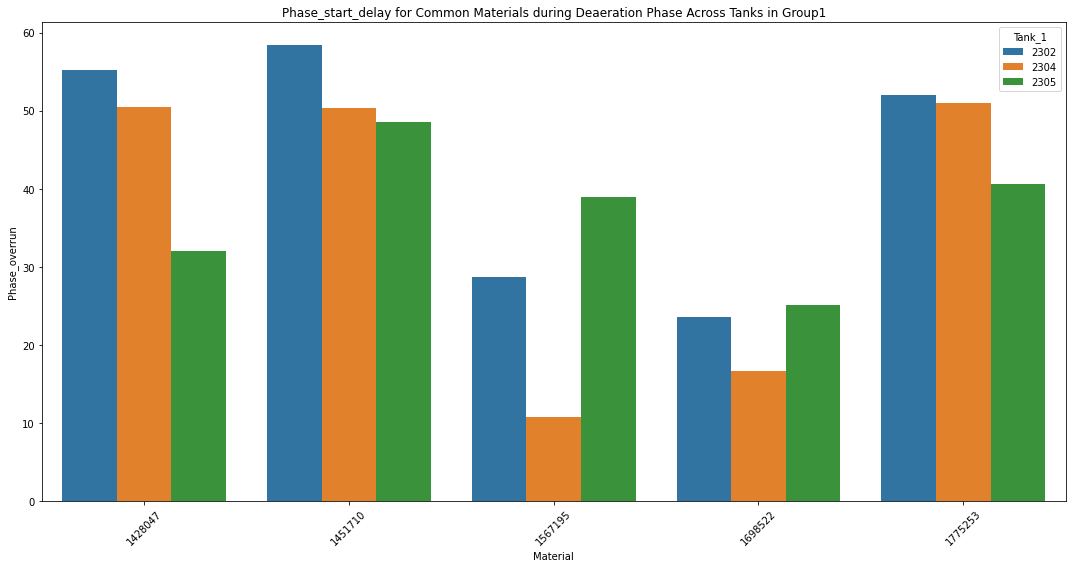

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_overrun')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Deaeration in  Production Tanks  : '2302', '2304', '2305'

In [42]:
tanks_in_group1 = ['2302', '2304', '2305']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [43]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [44]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [45]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

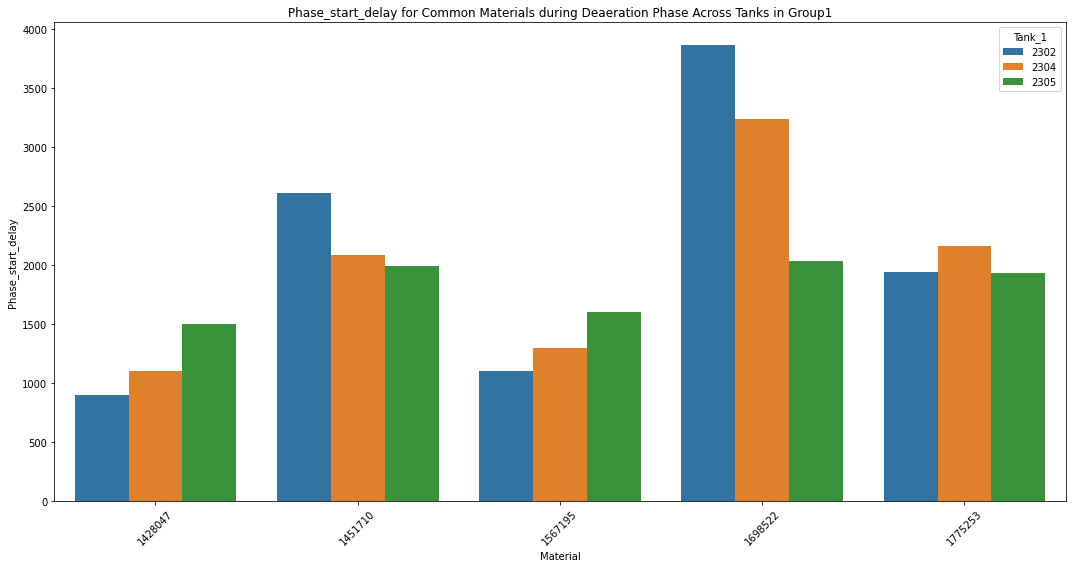

In [46]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : '2501', '2502'

In [47]:
tanks_in_group1 = ['2501', '2502']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [48]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [49]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [50]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

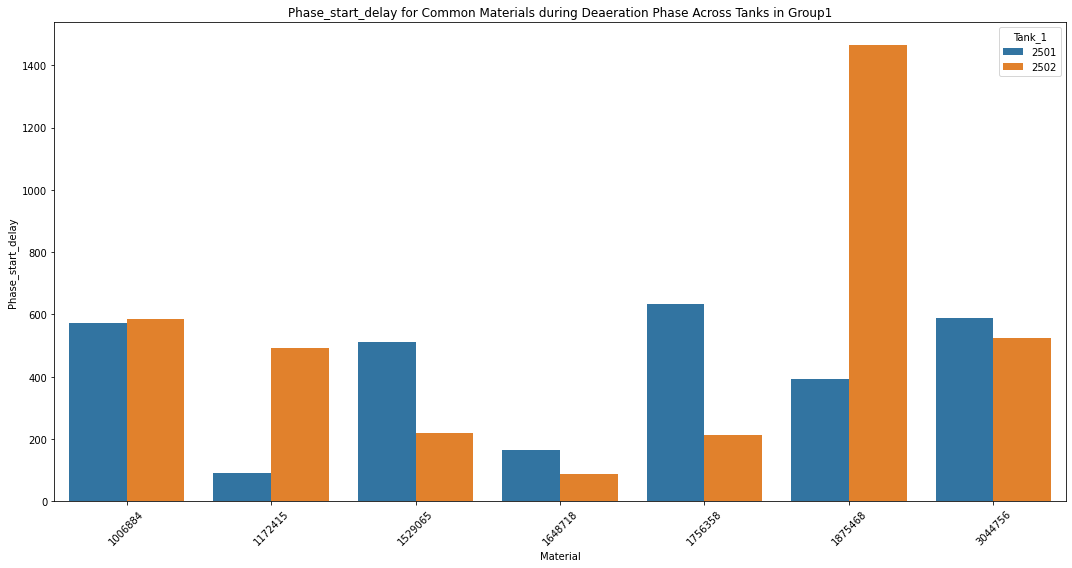

In [51]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#### Production Tanks : '2503','2504'

In [52]:
tanks_in_group1 = ['2503','2504']
instruction_step_of_interest = 'STEP2_CONS-Deaeration'

In [53]:
filtered_data = Data[(Data['Tank_1'].isin(tanks_in_group1)) & 
                    (Data['Instruction_Step'] == instruction_step_of_interest)]

In [54]:
common_materials = filtered_data.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [55]:
filtered_data = filtered_data[filtered_data['Material'].isin(common_materials)]

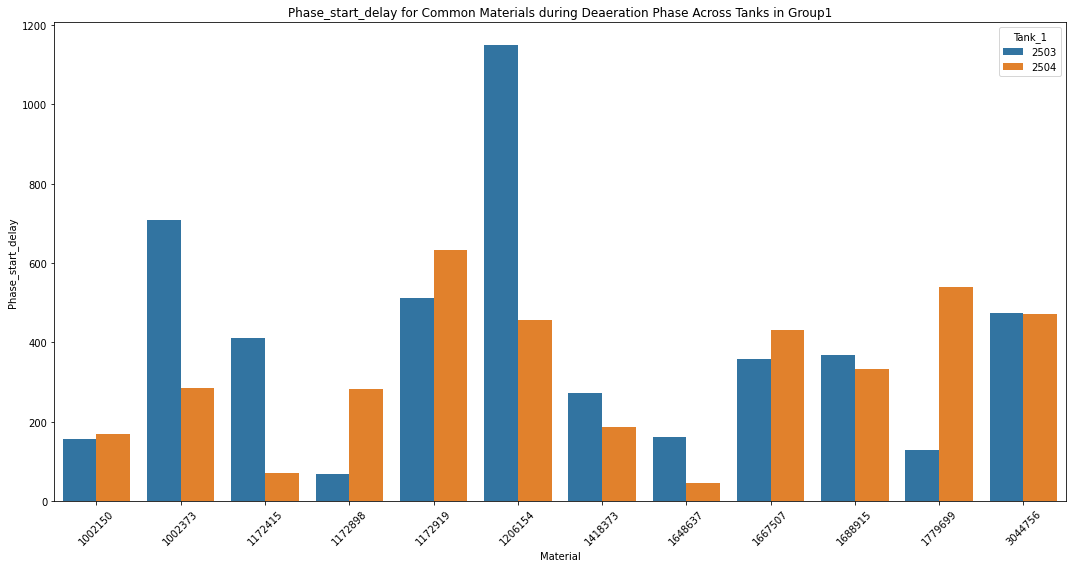

In [56]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_start_delay', hue='Tank_1', ci=None)

plt.title('Phase_start_delay for Common Materials during Deaeration Phase Across Tanks in Group1')
plt.ylabel('Phase_start_delay')
plt.xlabel('Material')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#ingredient_of_interest = ['1461896', '1254972','1031006','1243269','1196706','1815609']
#ingredient_data = data[data['INGRED_ID'] == ingredient_of_interest]

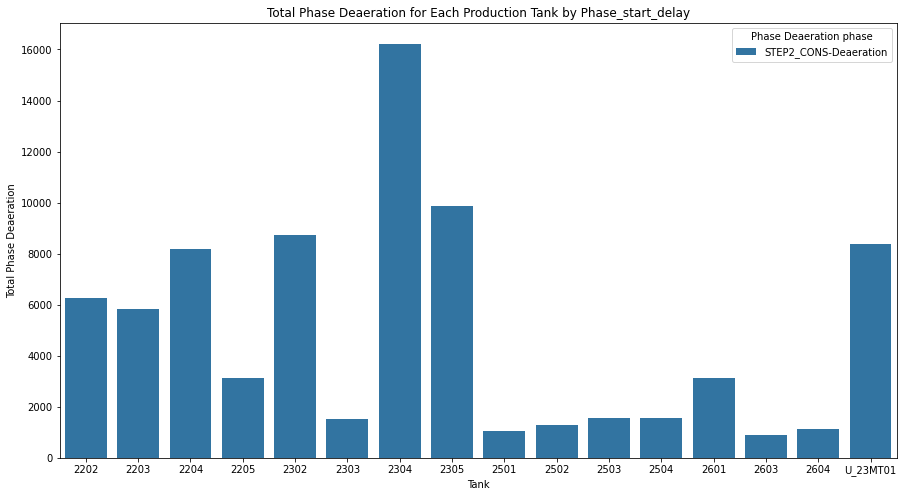

       Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0        2202  107867810   1648637              31           11.0   
1        2202  107899926   1775253              26            6.0   
2        2202  107956670   1397022              11            0.0   
3        2202  107963677   1775253              70           50.0   
4        2202  107964410   1775253              85           65.0   
..        ...        ...       ...             ...            ...   
305  U_23MT01  107781793   1698522              32            8.0   
306  U_23MT01  107787543   1520984              43           31.0   
307  U_23MT01  107833745   1775253              33           13.0   
308  U_23MT01  107856519   1451710              26            6.0   
309  U_23MT01  108067817   1775253             257          237.0   

     Phase_start_delay  Quantity  Flowrate_KGMIN  Target_Phase_duration  \
0                 2144    1303.0         86.2927                   10.0   
1                 217

In [116]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)

# 'STEP1_CONS - refers to the instruction step of the manual addition of ingredients to the production tank'
# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[Data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material', 'Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_start_delay', hue='Instruction_Step', ci=None)
plt.title('Total Phase Deaeration for Each Production Tank by Phase_start_delay')
plt.ylabel('Total Phase Deaeration')
plt.xlabel('Tank')
plt.legend(title='Phase Deaeration phase')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df5 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


print(aggregated_total_durations_df5)

In [ ]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
specific_tanks = ['2202', '2203', '2204']

# Filter the dataframe for desired instruction steps
desired_steps = ['STEP2_CONS-Deaeration']
filtered_data = Data[(Data['Instruction_Step'].isin(desired_steps)) & (Data['Tank_1'].isin(specific_tanks))]


# Calculate total phase duration for each desired instruction step for each tank and material
total_Phase_start_delay = filtered_data.groupby(['Tank_1','Material','Instruction_Step'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))



#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID','Material']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()


print(aggregated_total_durations_df2)

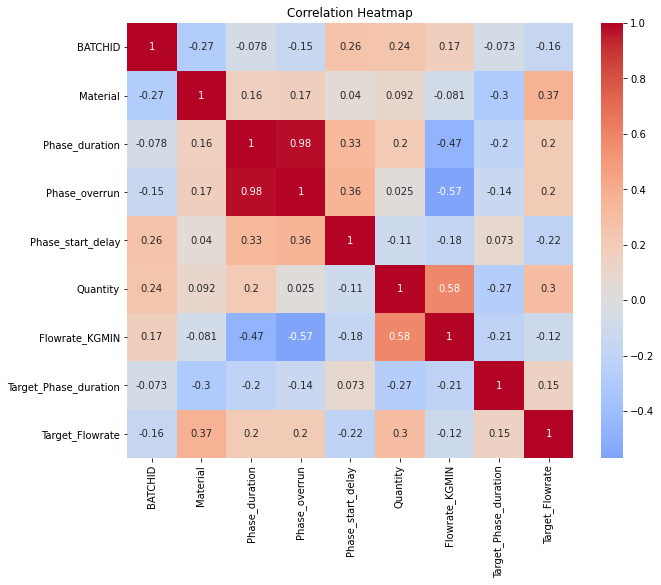

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.DataFrame(aggregated_total_durations_df5)

# Calculate correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Handling missing values
#aggregated_total_durations_df2.dropna(inplace=True)  # Remove rows with missing values

In [ ]:
# Handling du# Handling duplicates
#aggregated_total_durations_df2.drop_duplicates(inplace=True)  # Remove duplicate rowsplicates

In [118]:
# Define columns where you want to detect and remove outliers
ProductionTank22_df5 = pd.DataFrame(aggregated_total_durations_df5)
ProductionTank22_df5
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
  ProductionTank22_df5 = remove_outliers_iqr(ProductionTank22_df5, col)
# Display the cleaned DataFrame
print(ProductionTank22_df5)

       Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0        2202  107867810   1648637              31           11.0   
1        2202  107899926   1775253              26            6.0   
7        2202  108026759   1775253              28            9.0   
9        2202  108045117   1520984              32           20.0   
10       2202  108073632   1451704              23            2.0   
..        ...        ...       ...             ...            ...   
296      2604  108081814   1985101               7            2.0   
303  U_23MT01  107765823   1520984              31           19.0   
305  U_23MT01  107781793   1698522              32            8.0   
306  U_23MT01  107787543   1520984              43           31.0   
307  U_23MT01  107833745   1775253              33           13.0   

     Phase_start_delay  Quantity  Flowrate_KGMIN  Target_Phase_duration  \
0                 2144  1303.000         86.2927                   10.0   
1                 217

In [119]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank22_df5[numerical_cols] = scaler.fit_transform(ProductionTank22_df5[numerical_cols])
print(ProductionTank22_df5)

       Tank_1    BATCHID  Material  Phase_duration  Phase_overrun  \
0        2202  107867810   1648637        0.982099       0.449941   
1        2202  107899926   1775253        0.564868      -0.190194   
7        2202  108026759   1775253        0.731760       0.193887   
9        2202  108045117   1520984        1.065546       1.602184   
10       2202  108073632   1451704        0.314529      -0.702302   
..        ...        ...       ...             ...            ...   
296      2604  108081814   1985101       -1.020613      -0.702302   
303  U_23MT01  107765823   1520984        0.982099       1.474157   
305  U_23MT01  107781793   1698522        1.065546       0.065860   
306  U_23MT01  107787543   1520984        1.983456       3.010481   
307  U_23MT01  107833745   1775253        1.148992       0.705995   

     Phase_start_delay  Quantity  Flowrate_KGMIN  Target_Phase_duration  \
0             0.884228  1303.000        0.738055                   10.0   
1             0.91072

In [120]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_total_durations_df5.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank22_df5.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  3.100000e+02  3.100000e+02      310.000000     310.000000   
mean   1.078411e+08  1.610790e+06       43.225806      29.141935   
std    1.513999e+05  4.188379e+05       66.641926      63.323124   
min    1.075483e+08  1.002150e+06        1.000000       0.000000   
25%    1.077193e+08  1.397597e+06       11.000000       1.000000   
50%    1.078356e+08  1.648637e+06       19.000000       7.000000   
75%    1.079684e+08  1.775253e+06       40.000000      23.750000   
max    1.080913e+08  3.055706e+06      557.000000     549.000000   

       Phase_start_delay     Quantity  Flowrate_KGMIN  Target_Phase_duration  \
count         310.000000   310.000000      310.000000             310.000000   
mean         1657.038710  1004.166545       70.263300              10.552419   
std          1599.871018   683.566086       70.304024               4.858253   
min             6.000000    

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2203_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df5)

# Define features and target
#X = df.drop(['Phase_start_delay'], axis=1)

#y = df['Phase_start_delay']

# Define features and target
X = df.drop(['Tank_1','BATCHID','Material','Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
#gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
#dt_model = DecisionTreeRegressor(random_state=42)
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred_train = et_model.predict(X_train)
et_pred_test = et_model.predict(X_test)
et_train_mse = mean_squared_error(y_train, et_pred_train)
et_test_mse = mean_squared_error(y_test, et_pred_test)
et_train_r2 = r2_score(y_train, et_pred_train)
et_test_r2 = r2_score(y_test, et_pred_test)
results_df = results_df.append({'Model': 'Extra Trees Regressor', 'Train MSE': et_train_mse, 'Test MSE': et_test_mse, 'Train R2': et_train_r2, 'Test R2': et_test_r2}, ignore_index=True)


# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('22AGresults.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+------------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |    Test R2 |
+====+=============================+=============+============+============+============+
|  0 | Linear Regression           | 0.11978     |   0.339888 |   0.876332 |  0.695776  |
+----+-----------------------------+-------------+------------+------------+------------+
|  1 | Ridge Regression            | 0.11992     |   0.339976 |   0.876187 |  0.695697  |
+----+-----------------------------+-------------+------------+------------+------------+
|  2 | Lasso Regression            | 0.881486    |   1.22509  |   0.089897 | -0.0965395 |
+----+-----------------------------+-------------+------------+------------+------------+
|  3 | Random Forest Regressor     | 0.0445177   |   0.171687 |   0.954037 |  0.846328  |
+----+-----------------------------+-------------+------------+------------+------------+
|  4 | Gra

In [122]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

LinearRegression:
  Mean MSE: 0.223716
  Std MSE: 0.069256

Ridge:
  Mean MSE: 0.224328
  Std MSE: 0.064931

Lasso:
  Mean MSE: 1.011481
  Std MSE: 0.355805

RandomForestRegressor:
  Mean MSE: 0.138169
  Std MSE: 0.100277

GradientBoostingRegressor:
  Mean MSE: 0.112624
  Std MSE: 0.066663

SVR:
  Mean MSE: 1.053604
  Std MSE: 0.425956

MLPRegressor:
  Mean MSE: 345.678782
  Std MSE: 392.273115

DecisionTreeRegressor:
  Mean MSE: 0.213760
  Std MSE: 0.131673

AdaBoostRegressor:
  Mean MSE: 0.239185
  Std MSE: 0.096037

BaggingRegressor:
  Mean MSE: 0.137377
  Std MSE: 0.096345



In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df5)

# Define features and target
#X = df.drop(['Phase_overrun'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Tank_1','BATCHID','Material','Phase_start_delay','Target_Phase_duration','Target_Flowrate','Phase_overrun'], axis=1)
y = df['Phase_overrun']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)


# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('22AGresults.xlsx', index=False)

                         Model  Train MSE  Test MSE  Train R2   Test R2
0            Linear Regression   0.122048  0.360798  0.873990  0.677060
1             Ridge Regression   0.122192  0.360677  0.873841  0.677169
2             Lasso Regression   0.122438  0.354177  0.873587  0.682987
3      Random Forest Regressor   0.012275  0.102064  0.987327  0.908645
4  Gradient Boosting Regressor   0.000001  0.122781  0.999999  0.890103
5      Decision Tree Regressor   0.000049  0.083906  0.999949  0.924898
6            Bagging Regressor   0.011746  0.103586  0.987873  0.907283
7           AdaBoost Regressor   0.074472  0.167254  0.923110  0.850295
+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           | 0.122048    |  0.360798  |   0.87399  |  0.67706

In [125]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [126]:
df = pd.DataFrame(ProductionTank22_df5)

# Assume the last column is the target variable and the rest are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
num_components = 5  # You can adjust this value based on your data
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a linear regression model on the transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model using multiple metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

ValueError: could not convert string to float: 'U_23MT01'

In [88]:
from sklearn.linear_model import Ridge

# Create and train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model using the same metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")
print(f"R-squared: {r2_ridge}")

Ridge Regression Model:
Mean Squared Error: 112.57219854464229
Root Mean Squared Error: 10.61000464395008
Mean Absolute Error: 6.146517437351953
R-squared: 0.2877024730644928


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df5)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Phase_start_delay'], axis=1)
y = df['Phase_start_delay']




# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Define a Convolutional Neural Network (CNN)
def build_cnn():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape data for CNN (add an extra dimension for channels)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define a Convolutional Neural Network (CNN)
def build_cnn():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the CNN
cnn = build_cnn()
cnn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_cnn = cnn.predict(X_train_reshaped)
pred_test_cnn = cnn.predict(X_test_reshaped)
train_mse_cnn = mean_squared_error(y_train, pred_train_cnn)
test_mse_cnn = mean_squared_error(y_test, pred_test_cnn)
train_r2_cnn = r2_score(y_train, pred_train_cnn)
test_r2_cnn = r2_score(y_test, pred_test_cnn)
results_df = results_df.append({'Model': 'Convolutional Neural Network', 'Train MSE': train_mse_cnn,
                                'Test MSE': test_mse_cnn, 'Train R2': train_r2_cnn, 'Test R2': test_r2_cnn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('neural_network_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df5)

# Define features and target
X = df.drop(['Tank_1', 'BATCHID', 'Material', 'Phase_start_delay', 'Target_Phase_duration', 'Target_Flowrate', 'Phase_overrun'], axis=1)
y = df['Phase_start_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can choose the number of neighbors
knn_model.fit(X_train_scaled, y_train)
knn_pred_train = knn_model.predict(X_train_scaled)
knn_pred_test = knn_model.predict(X_test_scaled)
knn_train_mse = mean_squared_error(y_train, knn_pred_train)
knn_test_mse = mean_squared_error(y_test, knn_pred_test)
knn_train_r2 = r2_score(y_train, knn_pred_train)
knn_test_r2 = r2_score(y_test, knn_pred_test)
results_df = results_df.append({'Model': 'K-Nearest Neighbors', 'Train MSE': knn_train_mse,
                                'Test MSE': knn_test_mse, 'Train R2': knn_train_r2, 'Test R2': knn_test_r2},
                               ignore_index=True)

# Support Vector Machine
svm_model = SVR(kernel='rbf')  # You can choose the kernel and tune other hyperparameters
svm_model.fit(X_train_scaled, y_train)
svm_pred_train = svm_model.predict(X_train_scaled)
svm_pred_test = svm_model.predict(X_test_scaled)
svm_train_mse = mean_squared_error(y_train, svm_pred_train)
svm_test_mse = mean_squared_error(y_test, svm_pred_test)
svm_train_r2 = r2_score(y_train, svm_pred_train)
svm_test_r2 = r2_score(y_test, svm_pred_test)
results_df = results_df.append({'Model': 'Support Vector Machine', 'Train MSE': svm_train_mse,
                                'Test MSE': svm_test_mse, 'Train R2': svm_train_r2, 'Test R2': svm_test_r2},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('knn_svm_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df5)

# Define features and target
X = df.drop(['Tank_1', 'BATCHID', 'Material', 'Phase_start_delay', 'Target_Phase_duration', 'Target_Flowrate', 'Phase_overrun'], axis=1)
y = df['Phase_start_delay']  # Assuming this is the column name for the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2'])

# Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_pred_train = nn_model.predict(X_train_scaled)
nn_pred_test = nn_model.predict(X_test_scaled)
nn_train_mse = mean_squared_error(y_train, nn_pred_train)
nn_test_mse = mean_squared_error(y_test, nn_pred_test)
nn_train_mae = mean_absolute_error(y_train, nn_pred_train)
nn_test_mae = mean_absolute_error(y_test, nn_pred_test)
nn_train_r2 = r2_score(y_train, nn_pred_train)
nn_test_r2 = r2_score(y_test, nn_pred_test)
results_df = results_df.append({'Model': 'Neural Network', 'Train MSE': nn_train_mse,
                                'Test MSE': nn_test_mse, 'Train MAE': nn_train_mae, 'Test MAE': nn_test_mae,
                                'Train R2': nn_train_r2, 'Test R2': nn_test_r2},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('nn_regression_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df5)

# Define features and target
X = df.drop(['Tank_1', 'BATCHID', 'Material', 'Phase_start_delay', 'Target_Phase_duration', 'Target_Flowrate', 'Phase_overrun'], axis=1)
y = df['Phase_start_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
neural_network_model = MLPRegressor(max_iter=1000, random_state=42)

# Grid Search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(estimator=neural_network_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Random Search
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': uniform(0.001, 0.1 - 0.001),
    'alpha': uniform(0.0001, 0.01 - 0.0001)
}

random_search = RandomizedSearchCV(estimator=neural_network_model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Print the best hyperparameters for grid search and random search
print("Best Hyperparameters (Grid Search):", best_params_grid)
print("Best Hyperparameters (Random Search):", best_params_random)

# You can evaluate the best models on the test set and calculate metrics as needed
best_model_grid_pred = best_model_grid.predict(X_test_scaled)
best_model_random_pred = best_model_random.predict(X_test_scaled)

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df)

# Define features and target
X = df.drop(['Phase_start_delay'], axis=1)
y = df['Phase_start_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
neural_network_model = MLPRegressor(max_iter=1000, random_state=42)

# Grid Search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(estimator=neural_network_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_
best_model_grid_pred = best_model_grid.predict(X_test_scaled)

# Random Search
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': uniform(0.001, 0.1 - 0.001),
    'alpha': uniform(0.0001, 0.01 - 0.0001)
}

random_search = RandomizedSearchCV(estimator=neural_network_model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
best_model_random_pred = best_model_random.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

evaluate_model(y_test, best_model_grid_pred, "Best Model (Grid Search)")
evaluate_model(y_test, best_model_random_pred, "Best Model (Random Search)")

Best Model (Grid Search) Evaluation:
Mean Squared Error: 2.04512650552257
Mean Absolute Error: 1.152460135055058
R-squared: -8.458188341812122

Best Model (Random Search) Evaluation:
Mean Squared Error: 1.8534458771537585
Mean Absolute Error: 1.0528302792373443
R-squared: -7.5717143365642805

